<a href="https://colab.research.google.com/github/subhash505/NLP_code/blob/main/5_NLP_Exploring_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

In [ ]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (5157, 14)


In [ ]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


## 2. Generating Word Frequency

In [ ]:
import spacy

In [ ]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [ ]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values[:1000])

In [ ]:
# Creating Doc object
doc=nlp(combined_tweets)

In [ ]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    
    # Printing frequencies
    print(word_freq[:20])
    
    return word_freq

In [ ]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 1332
:                  903
RT                 816
                  556
Demonetization     544
.                  476
\r\n               441
on                 340
demonetization     324
is                 323
of                 314
the                281
to                 250
in                 240
and                226
she                221
,                  213
Modi               199
a                  177
against            164
dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

In [ ]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 2386


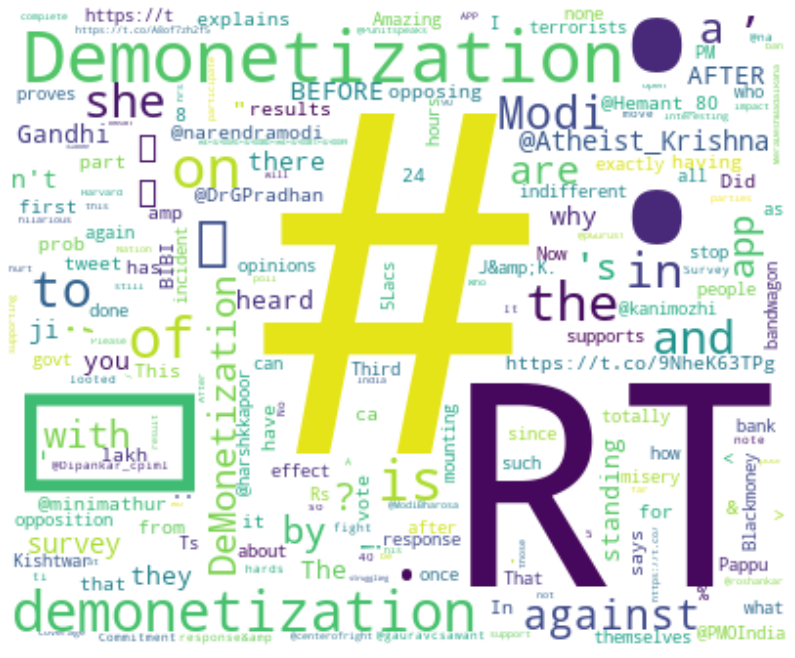

In [ ]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [ ]:
import re

In [ ]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [ ]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [ ]:
# Creating Doc object
doc=nlp(combined_tweets)

In [ ]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [ ]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization             1008
\r\n                        441
                           434
                            428
modi                        203
app                         173
survey                      151
\r\n\r\n                    147
                           122
@atheist_krishna            122
ji                           99
standing                     96
gandhi                       93
heard                        92
https://t.co/9nhek63tpg      91
says                         84
explains                     76
8                            76
tweet                        73
@drgpradhan                  73
dtype: int64


In [ ]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 1955


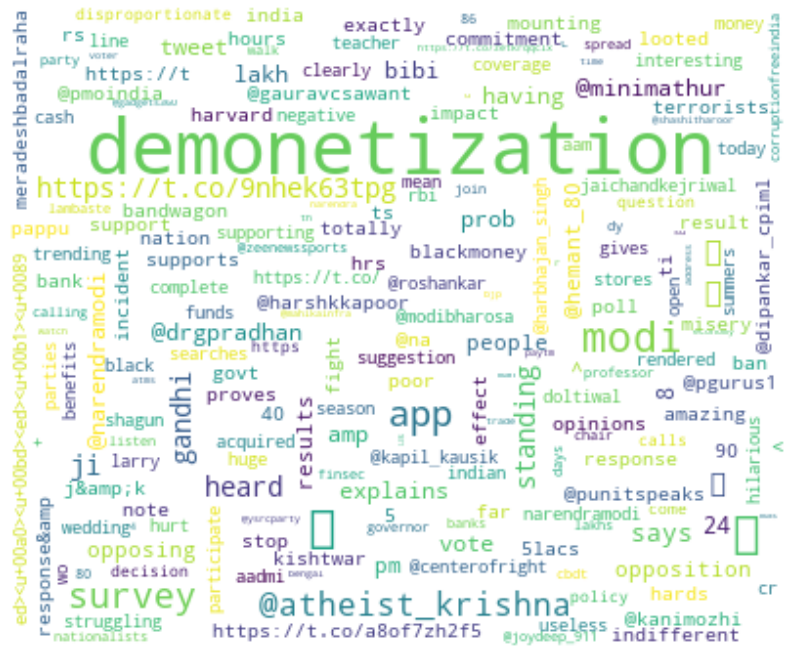

In [ ]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [ ]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [ ]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [ ]:
# Creating Doc object
doc=nlp(combined_tweets)

In [ ]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [ ]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization             1008
modi                        203
app                         173
survey                      151
@atheist_krishna            122
ji                           99
standing                     96
gandhi                       93
heard                        92
https://t.co/9nhek63tpg      91
says                         84
8                            76
explains                     76
response                     76
tweet                        73
bibi                         73
having                       73
@drgpradhan                  73
prob                         73
@narendramodi                72
dtype: int64


In [ ]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 1943


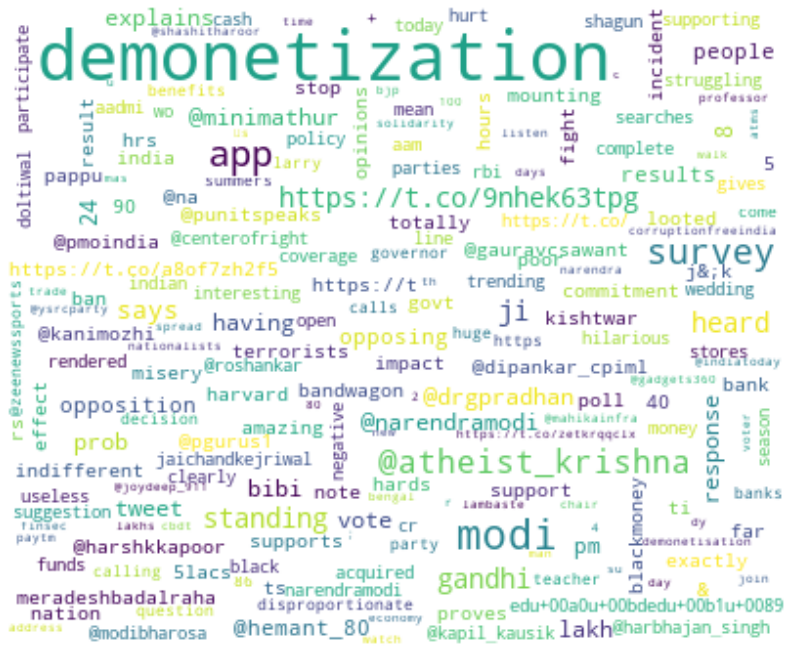

In [ ]:
# Generating wordcloud
generate_wordcloud(word_freq)